##Feature Extraction

In [1]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

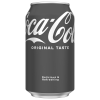

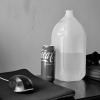

In [2]:
img1 = cv2.imread('/content/drive/MyDrive/Dive in Learning/Realidad Aumentada/Básico/Colab Notebooks/Coca Cola.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2_imshow(cv2.resize(img1, (100,100),interpolation=cv2.INTER_AREA))

img2 = cv2.imread('/content/drive/MyDrive/Dive in Learning/Realidad Aumentada/Básico/Colab Notebooks/Coca en sitio 1.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
cv2_imshow(cv2.resize(img2, (100,100),interpolation=cv2.INTER_AREA))

In [3]:
orb = cv2.ORB_create(nfeatures=5000)
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [4]:
print("Keypoints en la Imagen 1: ", len(kp1))
print("Keypoints en la Imagen 2: ", len(kp2))

Keypoints en la Imagen 1:  1945
Keypoints en la Imagen 2:  5000


#Brute Force

In [5]:
# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

In [6]:
print("Matches en ambas imagenes: ", len(matches))

Matches en ambas imagenes:  700


In [ ]:
# draw first 50 matches
match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None)
cv2_imshow(match_img)

#FLANN

In [ ]:
FLAN_INDEX_KDTREE = 0
index_params = dict (algorithm = FLAN_INDEX_KDTREE, trees=1)
search_params = dict (checks=50)

In [ ]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [ ]:
matches = flann.knnMatch(np.asarray(des1, np.float32), np.asarray(des2, np.float32), k=2)

In [ ]:
good_matches = []

for m1, m2 in matches:
  if m1.distance < 0.5 * m2.distance:
    good_matches.append([m1])

In [ ]:
flann_matches =cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
cv2_imshow(flann_matches)